In [48]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [3]:
def nss(beta, maturity, lamb=0.0609):
    return beta[0] + beta[1] * ( (1 - math.exp(-lamb * maturity)) / (lamb * maturity)) + beta[2] * ( (1 - math.exp(-lamb * maturity)) / (lamb * maturity) - math.exp(-lamb * maturity))

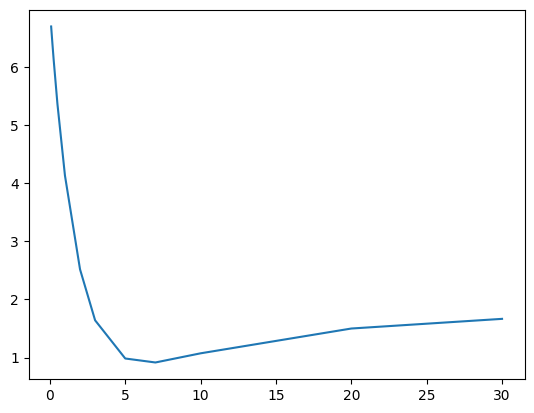

In [37]:
lst = []
maturities = [1/12, 2/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30]

for maturity in maturities:
    lst.append(nss([2, 5, -10], maturity, lamb=0.5))

plt.plot(maturities, lst)

# IN LAYER WILL CONSIST OF 8 ELEMENTS (COEFS OF 8 BASIS SPLINES)
# OUT LAYER WILL CONSIST OF 4 ELEMENTS (BETA_0, BETA_1, BETA_2, LAMBDA)

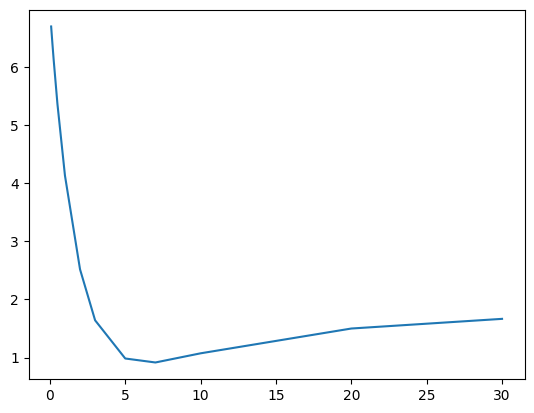

In [55]:
def nss(coef=pd.Series([2, 5, -10, 0.5]), maturity=np.array([1/12, 2/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])):
    maturity = np.asarray(maturity)  # Ensure maturity is a NumPy array
    term1 = (1 - np.exp(-coef.iloc[3] * maturity)) / (coef.iloc[3] * maturity)
    term2 = term1 - np.exp(-coef.iloc[3] * maturity)
    return coef.iloc[0] + coef.iloc[1] * term1 + coef.iloc[2] * term2

yld = nss()
plt.plot(maturities, yld)

In [56]:
df = pd.DataFrame({
    'beta_0': [1, 2, 3, 4],
    'beta_1': [2, 3, 4, 1],
    'beta_2': [3, 1, 2, 4],
    'beta_3': [0.5, 0.7, 0.1, 0.2]
})
df

,beta_0,beta_1,beta_2,beta_3
0,1,2,3,0.5
1,2,3,1,0.7
2,3,4,2,0.1
3,4,1,4,0.2


In [57]:
df.apply(nss, axis=1, result_type="expand")

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.019697,3.037202,3.052633,3.087582,3.115101,3.056964,2.920176,2.589575,2.294840,1.973048,1.499841,1.333332
1,4.942234,4.885600,4.830097,4.670305,4.380070,3.905983,3.549055,3.078148,2.802801,2.569996,2.285713,2.190476
2,6.991667,6.983334,6.975001,6.950010,6.900080,6.800616,6.701999,6.508571,6.321813,6.056964,5.323324,4.800852
3,5.024678,5.048721,5.072140,5.138779,5.256808,5.439719,5.564656,5.689085,5.704337,5.620321,5.153843,4.821353
